Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "João Antonio Oliveira Pedrosa"
COLLABORATORS = ""

---

# Lista 04 - Testes de Hipótese

**Objetivos de Aprendizado**
- Saber computar testes de permutação
- Continuar no estudo de Testes A/B

In [2]:
# -*- coding: utf 8

from matplotlib import pyplot as plt


from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_equal
from numpy.testing import assert_equal


import pandas as pd
import numpy as np


plt.style.use('seaborn-colorblind')
plt.ion()

In [3]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
#Fixa a semente geradora de numeros aleatorios para gerar os mesmos resultados a cada execucao
np.random.seed(42)

## Introdução

O objetivo deste notebook é uma exploração de testes de permutação. Para tal, vamos primeiro trabalhar com dados sintéticos. Após isto, vamos voltar para o caso de estudo do Enem da lista anterior. Leia o material no site da disciplina além dos slides da matéria.


## Exercício 01

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [4]:
def q1a():
    return [False, True, False]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance (TVD):

$$ \mathit{TVD}(p, q) = \frac{1}{2}|p - q| = \frac{1}{2}\sum_{i=1}^n |p_i - q_i| $$    
onde $p$ e $q$ são os vetores de proporções

In [5]:
def tvd(p, q):
    cont = 0
    for i in range(len(p)):
        cont += abs(p[i] - q[i])
    return 0.5*cont

In [6]:
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [7]:
def q1c():
    entrevistados = [100,600,300]
    universidade  = [2000,8000,2500]
    prop_ent      = [x/sum(entrevistados) for x in entrevistados]
    prop_uni      = [x/sum(universidade)  for x in universidade]
    
    return tvd(prop_ent, prop_uni)

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

Por exemplo, o vetor [0, 0, 1, 1, 1, 2] representa uma população de tamanho 6, com dois elementos na classe 0, três elementos na classe 1 e um elemento na classe 2. As proporções são 2/6, 3/6 e 1/6, respectivamente.

In [8]:
def calcula_proporcao(amostra, valor):
    return sum(1 for x in amostra if x == valor) / len(amostra)

def gera_amostra(tamanho_amostra):
    universidade = [0 for i in range(2000)]
    universidade += [1 for i in range(8000)]
    universidade += [2 for i in range(2500)]
    universidade = np.array(universidade)
    np.random.shuffle(universidade)
    amostra = universidade[:tamanho_amostra]
    
    p0 = calcula_proporcao(amostra, 0)
    p1 = calcula_proporcao(amostra, 1)
    p2 = calcula_proporcao(amostra, 2)

    return [p0, p1, p2]

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

Sua saída deve similar a figura abaixo

![](./saida1.png)

In [9]:
prop_uni = [0.16, 0.64, 0.2]

val = []

for i in range(10000):
    prop_amostra = gera_amostra(1000)
    val.append(tvd(prop_amostra, prop_uni))

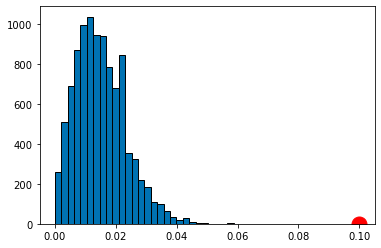

In [10]:
plt.hist(val, edgecolor = "black", bins = 30)
plt.plot(0.1, 0, 'ro', markersize=15)

F) Escreva uma função q1f(x) que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de x% de confiança.

__Dica__: Utilize o método baseado em boostrap, ou seja, calcule o TVD para um número grande de amostras da população, como foi feito no passo anterior. Em seguida, encontre o percentil dos TVDs calculados que corresponde ao nível de confiança de 90%.

Retorne apenas o lado direito do intervalo de confiança para o TVD.


In [13]:
def q1f(x):
    prop_uni = [0.16, 0.64, 0.2]
    
    val = []

    for i in range(10000):
        prop_amostra = gera_amostra(1000)
        val.append(tvd(prop_amostra, prop_uni))
        
    return np.percentile(np.array(val), 100 - ((100-x)/2))

In [14]:
assert_almost_equal( q1f(95), 0.034, 3 )
assert_almost_equal( q1f(90), 0.031, 3 )
assert_almost_equal( q1f(80), 0.026, 3 )

## Exercício 02

Agora, vamos repetir os experimentos da Lista03 via testes de permutação. Para tal, vamos fazer uso do arquivo ```enem2015.csv```. Diferente da Lista03, aqui não temos mais que comparar intervalos de confiança. Podemos trabalhar diretamente com `p-valores`. 

Nos estatística de teste será a diferença entre as médias de diferentes tipos de escola. Usando o teste de permutação, vamos verificar qual é a chance tal diferença pode ser explicada pelo acaso ou não.

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('enem2015.csv')
df.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


A) Implemente uma função que retorne a diferença entre a média das notas das escolas públicas federais e a média das notas de  escolas privadas. Exemplo:

```python
def q2a(df):
    media_federal = 631.0
    media_particular = 620.0
    return 11.0
```

In [28]:
def q2a(df):
    nota_federal = df[df["DEPENDENCIA_ADMINISTRATIVA"] == "Federal"]["NOTA_MEDIA_ESCOLA"]
    nota_privada = df[df["DEPENDENCIA_ADMINISTRATIVA"] == "Privada"]["NOTA_MEDIA_ESCOLA"]
    media_federal = nota_federal.mean() 
    media_privada = nota_privada.mean()
    return media_federal - media_privada 

In [29]:
q2a(df)

9.21003744957261

B) Realize permutações com os rótulos (Federal / Privada), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias notas, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

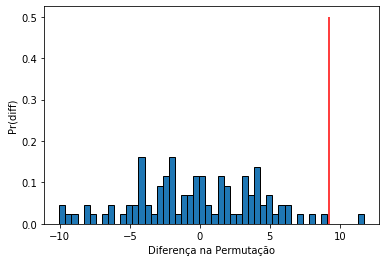

In [30]:
from IPython.display import Image
Image('100permutacoes.png')

In [31]:
# YOUR CODE HERE
# raise NotImplementedError()

B) Escreva abaixo o que você observou com os gráficos.

YOUR ANSWER HERE